In [1]:
# Imports
import sys
sys.path.insert(0, '/media/carterrhea/carterrhea/SIGNALS/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt
import LUCI.LuciFit as lfit
from astropy.io import fits
import numpy as np
import keras

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
cube_dir = '/media/carterrhea/carterrhea/Benjamin'  # Path to data cube
cube_name = 'A0426_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'A0426'
redshift = 0.017284  # Redshift of NGC 1275
ML_ref = '/media/carterrhea/carterrhea/SIGNALS/LUCI/ML/Reference-Spectrum-R1800'
ML_model = '/media/carterrhea/carterrhea/SIGNALS/LUCI/ML/R1800-PREDICTOR-I'

In [3]:
# Create Luci object
cube = Luci(cube_dir+'/'+cube_name, cube_dir, object_name, redshift, ML_ref, ML_model)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:11<00:00,  1.23s/it]


100%|██████████| 2048/2048 [00:07<00:00, 275.85it/s]


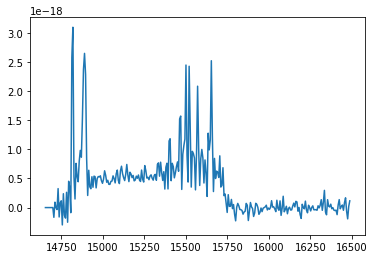

In [4]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum
plt.plot(bkg_axis, bkg_sky)

In [8]:
axis, sky = cube.extract_spectrum(1357, 1367, 608, 618, bkg=bkg_sky, mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|██████████| 10/10 [00:00<00:00, 5799.65it/s]


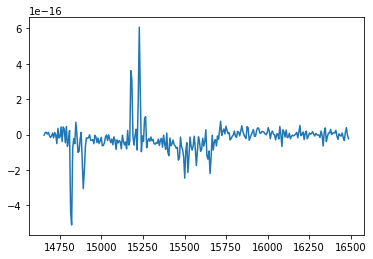

In [25]:
plt.plot(axis, sky-100*bkg_sky)

In [10]:
# Machine Learning Reference Spectrum
ref_spec = fits.open(ML_ref+'.fits')[1].data
channel = []
counts = []
for chan in ref_spec:  # Only want SN3 region
    channel.append(chan[0])
    counts.append(np.real(chan[1]))
min_ = np.argmin(np.abs(np.array(channel)-14700))
max_ = np.argmin(np.abs(np.array(channel)-15600))
wavenumbers_syn = channel[min_:max_]

In [29]:
fit = lfit.Fit(sky, axis, wavenumbers_syn, 'gaussian', ['Halpha'],
                keras.models.load_model(ML_model),
                 Plot_bool = False, bayes_bool=True)
fit_dict = fit.fit()

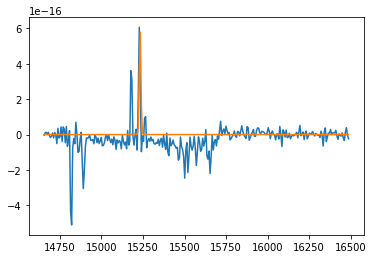

In [30]:
plt.plot(axis, sky-100*bkg_sky)
plt.plot(axis, fit_dict['fit_sol'])